1. Clone repos and install requirements

In [1]:
# !git clone https://github.com/CompVis/latent-diffusion.git
# !git clone https://github.com/CompVis/taming-transformers
# !pip install -e ./taming-transformers
# !pip install ipywidgets omegaconf>=2.0.0 pytorch-lightning>=1.0.8 torch-fidelity einops
#
# import sys
# sys.path.append(".")
# sys.path.append('./taming-transformers')
from taming.models import vqgan # checking correct import from taming

2. Define the Task (currently only superresolution is available, other tasks are coming soon)



In [1]:
# %cd latent-diffusion
import ipywidgets as widgets
from IPython.display import display
from omegaconf import OmegaConf
from ldm.util import instantiate_from_config
import torch

def load_model_from_config(config, ckpt):
    print(f"Loading model from {ckpt}")
    pl_sd = torch.load(ckpt, map_location="cpu")
    global_step = pl_sd["global_step"]
    sd = pl_sd["state_dict"]
    model = instantiate_from_config(config.model)
    m, u = model.load_state_dict(sd, strict=False)
    model.cuda()
    model.eval()
    return {"model": model}, global_step


mode = widgets.Select(options=['superresolution'],
    value='superresolution', description='Task:')
display(mode)

Select(description='Task:', options=('superresolution',), value='superresolution')

3. Download model checkpoint ( takes ~ 3 Min) and load model


In [2]:
from notebook_helpers import get_model
# model = get_model(mode.value)

config = OmegaConf.load("C:/Users/DaPC/PycharmProjects/ldm1/models/ldm/bsr_sr/config.yaml")
model, step = load_model_from_config(config, "C:/Users/DaPC/PycharmProjects/ldm1/models/ldm/bsr_sr/model.ckpt")

Loading model from C:/Users/DaPC/PycharmProjects/ldm1/models/ldm/bsr_sr/model.ckpt
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 113.62 M params.
Keeping EMAs of 308.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 3, 64, 64) = 12288 dimensions.
making attention of type 'vanilla' with 512 in_channels


4. Optional step: Upload your own conditioning image for superresolution (height and width have to take values in [128, 192, 256])

In [3]:
from notebook_helpers import get_custom_cond
get_custom_cond(mode.value)

4. Select conditioning from available examples or the uploaded custom conditioning

In [4]:
from notebook_helpers import get_cond_options, get_cond
dir, options = get_cond_options(mode.value)
cond_choice = widgets.RadioButtons(
        options=options,
        description='Select conditioning:',
        disabled=False
    )
display(cond_choice)

RadioButtons(description='Select conditioning:', options=('custom_00001.png', 'custom_fox1.jpg', 'sample_0.jpg…

5. Run Model

In [ ]:
from notebook_helpers import run
import os
custom_steps = 100
cond_choice_path = os.path.join(dir, cond_choice.value)
logs = run(model["model"], cond_choice_path, mode.value, custom_steps)

KeyboardInterrupt: 

6. Display Sample

(1, 1024, 1024, 3)


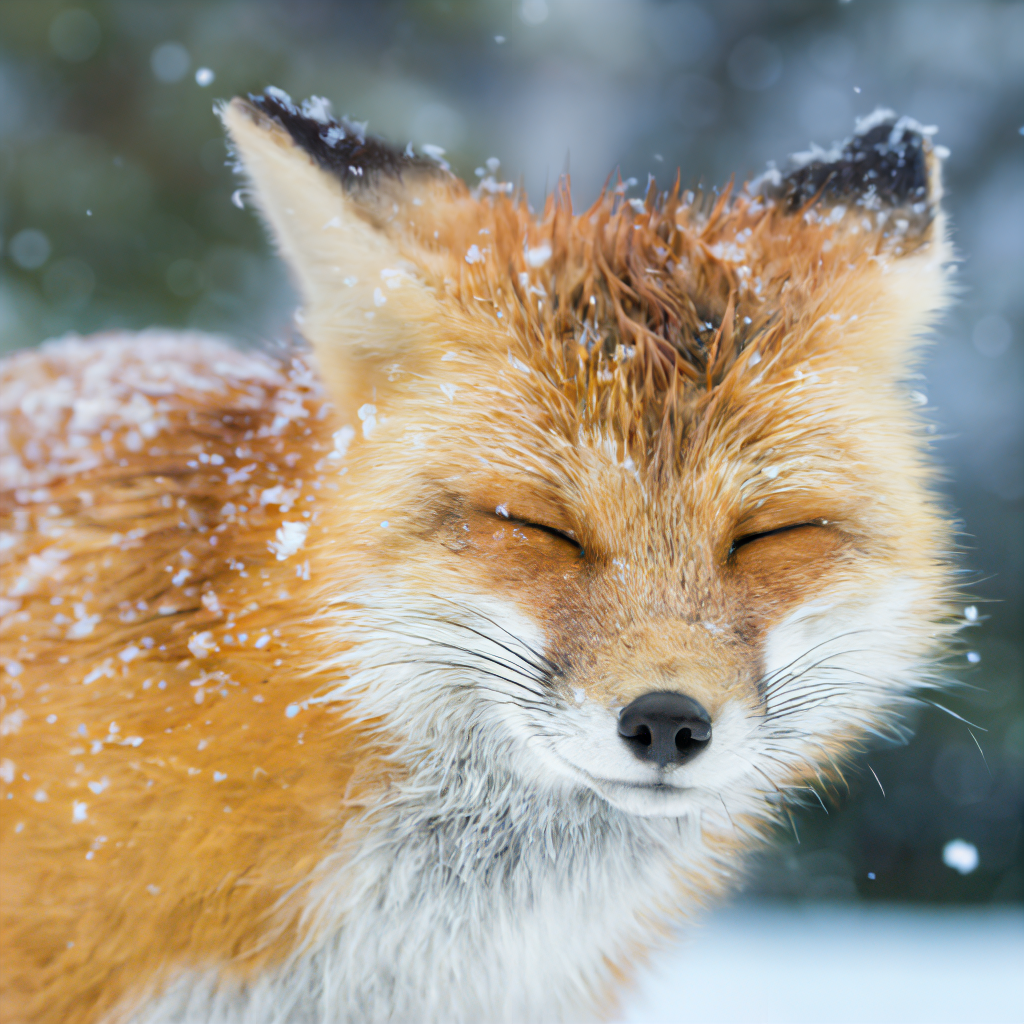

In [10]:
import torch
import numpy as np
import IPython.display as d
from PIL import Image

sample = logs["sample"]
sample = sample.detach().cpu()
sample = torch.clamp(sample, -1., 1.)
sample = (sample + 1.) / 2. * 255
sample = sample.numpy().astype(np.uint8)
sample = np.transpose(sample, (0, 2, 3, 1))
print(sample.shape)
a = Image.fromarray(sample[0])
display(a)
